### Generel prep

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

In [34]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Light.otf")
font_legend = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


In [35]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement
    # **Extended Palette**
    "#FE938C",  # Coral Pop
    "#FFC5A1",  # Soft Peach
    "#A9E5BB",  # Mint Pastel
    "#568EA6",  # Ocean Teal
    "#7868E6",  # Royal Lavender
    "#9F89D3",  # Soft Purple
    "#56E39F",  # Vibrant Aqua Green
    "#E8A87C",  # Earthy Sunset
    "#FFAEBC",  # Rosy Glow
    "#1976D2",  # True Deep Blue
    "#FFB347",  # Sunny Orange
    "#E5D4FF",  # Pale Lilac
    "#A6D6A4",  # Muted Sage
    "#D4A5A5",  # Warm Rose Beige
    "#AFCBFF",  # Arctic Blue
    "#FF7777",  # Soft Candy Red
    "#3F88C5",  # Rich Sky Blue
    "#FFD6E0",  # Gentle Pink Wash
    "#1F487E",  # Night Blue

    # **Additional Extended Colors**
    "#FAD4C0",  # Peach Cream
    "#C56E1A",  # Deep Terracotta
    "#8C2D19",  # Burnt Clay
    "#6096BA",  # Cool Sky Blue
    "#9AB87A",  # Fresh Olive Green
    "#FFDAA1",  # Warm Glow
    "#B6C0E0",  # Soft Powder Blue
    "#EAE7AF",  # Muted Sand
    "#5E8098",  # Muted Slate Blue
    "#D1C2F0",  # Misty Lavender
    "#6D9E58",  # Forest Moss
    "#DE8F6E",  # Warm Rust
    "#7FBCD2",  # Bright Aqua
    "#B8860B",  # Golden Brown
    "#E0ADC8",  # Soft Mauve
    "#357F7A",  # Deep Teal
    "#F1C3A0",  # Gentle Orange
]

In [36]:

filepath = r'ByCompany.csv'
Comp = pd.read_csv(filepath, sep=';')
filepath = r'ByTargets.csv'
Targ = pd.read_csv(filepath, sep=';')

In [37]:
#Targ.info()
#Comp.info()
Targ = Targ.copy()
Comp = Comp.copy()

### Categorizing sectors in both Comp and Targ

In [38]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

### Editing Targ df

In [39]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [40]:
# Remove duplicates of stbi_id in Targ to make counting easier
Targ = Targ.drop_duplicates(subset=['company_name'])

### Editing Comp df

In [41]:
Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)
Comp = Comp[Comp['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp['year_updated'].unique()

C:\Users\Val\AppData\Local\Temp\ipykernel_1724\2918682213.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [42]:
#group by year_updated and count the number commitment removed
#Comp['year_updated'] = pd.to_numeric(Comp['year_updated'], errors='coerce')

# Prep of DK data
Total amount of companies in denmark (2022) = 417137,
source https://www.dst.dk/da/Statistik/nyheder-analyser-publ/nyt/NytHtml?cid=48768 visited on 08/05/2025

In [43]:
#create dataframe with only locations with denmark
Targ_dk = Targ[Targ['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp[Comp['location'].str.contains('Denmark', na=False)]
Total_comp_dk = 417137

### Prep of Europe data
Total approximate amount of companies in europe (2022) = 5500000 + 3120000 + 1733000 + 32000000 = 42353000, sources https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Business_demography_statistics, https://www.statista.com/topics/10032/companies-in-russia/#editorsPicks,https://www.statista.com/statistics/995354/ukraine-number-business-entities/ and https://www.gov.uk/government/statistics/business-population-estimates-2022/business-population-estimates-for-the-uk-and-regions-2022-statistical-release-html all visited on 08/05/2025



In [44]:
Targ_Europe = Targ[Targ['region'].str.contains('Europe', na=False)]
Comp_Europe = Comp[Comp['region'].str.contains('Europe', na=False)]
Total_comp_Europe = 5500000 + 3120000 + 1733000 + 32000000
Comp_Europe.count()


sector                             5139
sectorCat                          5139
sbti_id                            5139
company_name                       5139
organization_type                  5139
location                           5139
region                             5139
near_term_status                   5139
near_term_target_classification    3507
near_term_target_year              3507
long_term_status                    935
long_term_target_classification     935
long_term_target_year               935
 net_zero_status                   2113
net_zero_year                       959
reason_for_extension_or_removal     565
date_updated                       5139
Unnamed: 16                           0
Unnamed: 17                           0
Unnamed: 18                           0
Unnamed: 19                           0
year_updated                       5139
dtype: int64

### Prep of Global data
Total amount of companies globaly (2022) = 347.29 million,
source https://www.demandsage.com/business-statistics/ visited on 08/05/2025

In [45]:
Targ_Global = Targ.copy()
Comp_Global = Comp.copy()
Total_comp_Global = 347290000
Comp_Global.count()
len(Comp_Global['sector'].unique())
Comp_Global['sectorCat'].unique()

array(['Financial Services', 'Transportation', 'Technology',
       'Real Estate', 'Food and Beverage', 'Commercial Services',
       'Healthcare', 'Mining', 'Consumer Products', 'Energy', 'Retail',
       'Chemicals', 'Automotive', 'Construction', 'Tobacco',
       'Hospitality', 'Utilities', 'Food Production',
       'Professional Services', 'Telecommunication',
       'Forestry and Paper Products', 'Manufacturing', 'Media',
       'Packaging', 'Consumer Services', 'Unknown', 'Defense',
       'Education'], dtype=object)

### Denmark vs Europe vs Global

In [46]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org_dk = Comp_dk[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_dk = []

# Loop through the rows of the dataset
for index, row in org_dk.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_dk.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_dk = pd.DataFrame(rows_dk)

org_Europe = Comp_Europe[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_europe = []


# Loop through the rows of the dataset
for index, row in org_Europe.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_europe.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_Europe = pd.DataFrame(rows_europe)

org_Global = Comp_Global[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_global = []

# Loop through the rows of the dataset
for index, row in org_Global.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_global.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_Global = pd.DataFrame(rows_global)

# Filtering companies with year_updated before 2023
filtered_dk = [org for _, org in org_sorted_dk.iterrows() if org["year_updated"] < 2023]
filtered_europe = [org for _, org in org_sorted_Europe.iterrows() if org["year_updated"] < 2023]
filtered_global = [org for _, org in org_sorted_Global.iterrows() if org["year_updated"] < 2023]

# Data
regions = ["Denmark", "Europe", "Global"]
validated_targets = [len(org_sorted_dk), len(org_sorted_Europe), len(org_sorted_Global)]
total_companies = [Total_comp_dk, Total_comp_Europe, Total_comp_Global]
# Companies without validated targets
not_validated = np.array(total_companies) - np.array(validated_targets)


"""
# Plot background color and bar color
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.6
ax.bar(regions, validated_targets, label="Validated Targets", color="green")
ax.bar(regions, not_validated, bottom=validated_targets, label="Not Validated Targets", color="grey")

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
#bottom_vals = None
#for i, col in enumerate(pivot_data.columns):
#    if bottom_vals is None:
#        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
#        bottom_vals = pivot_data[col]
#    else:
#        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
#        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Companies in Denmark, Europe and globally in 2022", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Region", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties( size=12)  # Set the font size here


# Add legend
#ax.legend(
#    title="SBTi in 2022",
#    loc="upper left",
#    bbox_to_anchor=(1, 1),
#    frameon=False,
#    prop=font_legend,
#    title_fontsize=12
#)

#plt.tight_layout()
#plt.show()"""
not_validated = np.array(total_companies) - np.array(validated_targets)

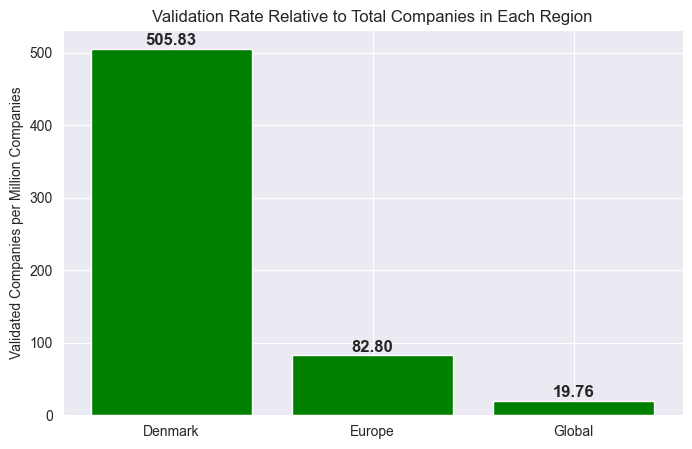

In [47]:
# Convert percentages into "Companies per Million"
validated_per_million = (np.array(validated_targets) / np.array(total_companies)) * 1_000_000

# Bar Chart Showing Companies per Million
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(regions, validated_per_million, color="green")

# Add text labels with numbers
for bar, value in zip(bars, validated_per_million):
    ax.text(bar.get_x() + bar.get_width() / 2, value + 5, f"{value:.2f}", ha="center", fontsize=12, fontweight="bold")

# Labels & Formatting
ax.set_ylabel("Validated Companies per Million Companies")
ax.set_title("Validation Rate Relative to Total Companies in Each Region")

plt.show()

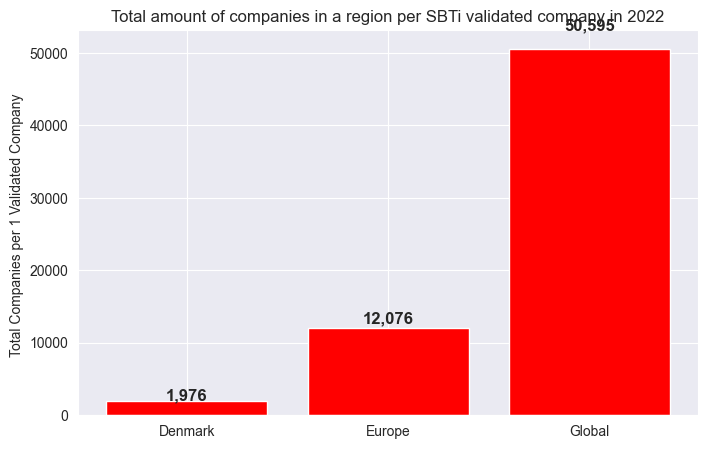

In [48]:
# Compute validation ratio: "1 Validated per X Companies"
validation_ratio = np.array(total_companies) / np.array(validated_targets)

# Bar Chart Showing "1 Validated per X Companies"
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(regions, validation_ratio, color="red")

# Add text labels with numbers
for bar, value in zip(bars, validation_ratio):
    ax.text(bar.get_x() + bar.get_width() / 2, value + (value * 0.05), f"{int(value):,}",
            ha="center", fontsize=12, fontweight="bold")

# Labels & Formatting
ax.set_ylabel("Total Companies per 1 Validated Company ")
ax.set_title("Total amount of companies in a region per SBTi validated company in 2022")
plt.show()

### Characteristics

Sector and Sector Category Breakdown
What to Explore:

Differences in industry composition (e.g., Financial Services, Transportation) among companies in Denmark versus Europe versus globally.

This can reveal whether certain sectors dominate in some regions and if that correlates with their sustainability commitments.

Visualization Options:

Grouped Bar Chart or Pie Charts: Show the percentage of companies in each sector (or sector category) by region.

Stacked Bar Chart: Compare sectors side by side across regions.

3. Near-Term and Long-Term Target Status
What to Explore:

The distribution of near-term statuses (e.g., "Targets set", "Commitment removed") across the regions.

The presence or absence of target years (both near-term and long-term) can indicate commitment intensity and ambition.

Visualization Options:

Stacked Bar Chart: Each bar represents a region, split by the counts of different near-term status categories.

Box/Violin Plots: If you have enough data, plot the distribution of target years per region to see if there are differences in ambition ranges.

pdate Recency and Data Freshness
What to Explore:

The date_updated or year_updated columns can show how recent the data is for each region.

Regions with older data might indicate slower update cycles or less engagement with recent sustainability initiatives.

Visualization Options:

Line Plot or Bar Chart: Show the frequency distribution of updated years across regions.

5. Net Zero and Long-Term Commitments
What to Explore:

How many companies have set long-term targets or net zero goals.

Compare these numbers as a percentage of total companies or as counts to see regional differences in long-term sustainability strategies.

Visualization Options:

Side-by-Side Bar Charts: For each region, show the count (or percentage) of companies with net zero targets.

Dual-Axis Charts: Compare near-term and long-term target adoption within the same graph.

6. Additional Considerations
Company Size or Type: If you have data regarding the size or organization type (e.g., Financial Institution vs. Corporate), plotting these distributions might reveal correlations between company type and commitment levels.

Qualitative Data: Sometimes the reason_for_extension_or_removal column holds qualitative insights. A word cloud or frequency bar chart derived from this text field (after cleaning the data) might highlight common challenges or concerns.



In [49]:
print(Comp_Global.head(2))


                                                sector           sectorCat  \
4243              Banks, Diverse Financials, Insurance  Financial Services   
4300  Ground Transportation - Railroads Transportation      Transportation   

       sbti_id          company_name      organization_type   location  \
4243  40008661  Teachers Mutual Bank  Financial Institution  Australia   
4300  40005752                Thalys              Corporate    Belgium   

       region    near_term_status near_term_target_classification  \
4243  Oceania  Commitment removed                             NaN   
4300   Europe         Targets set                  Well-below 2°C   

     near_term_target_year  ... long_term_target_year  net_zero_status  \
4243                   NaN  ...                   NaN              NaN   
4300                  2020  ...                   NaN              NaN   

     net_zero_year reason_for_extension_or_removal date_updated Unnamed: 16  \
4243           NaN              

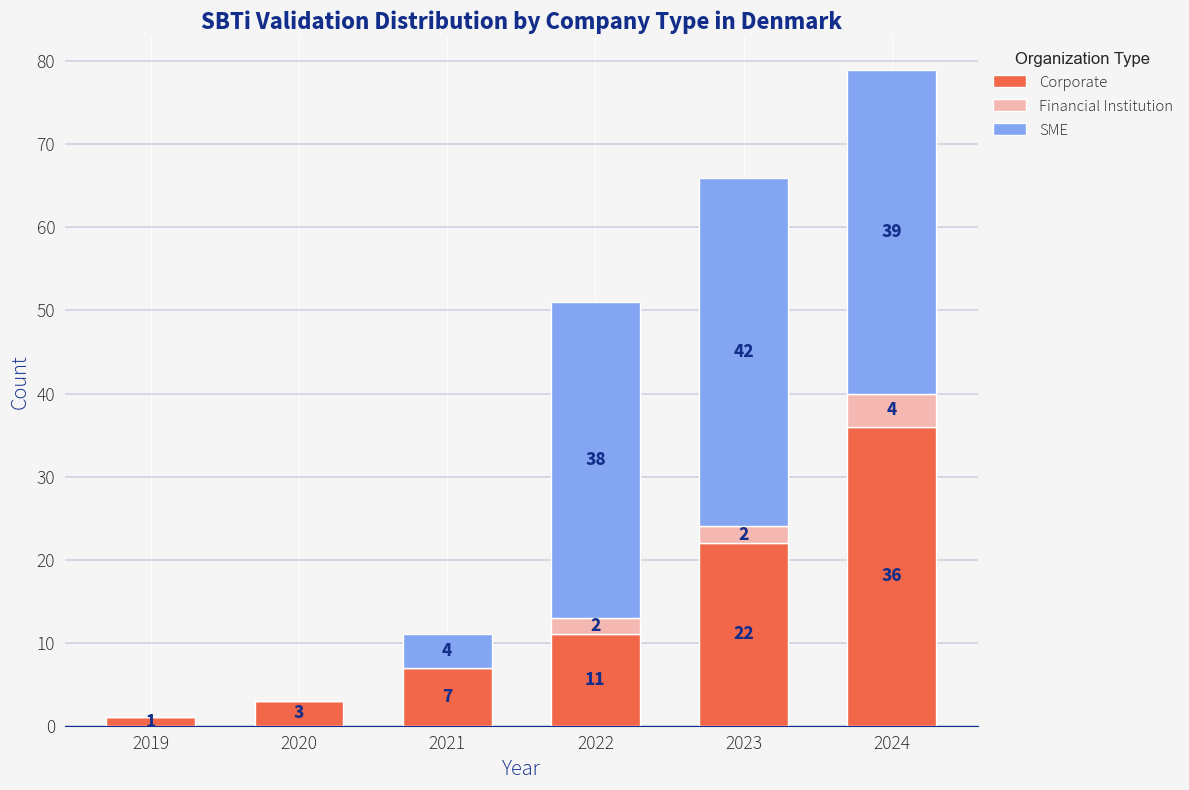

In [50]:
#count the number of companies within each organisational type with validated targets
org_growth = org_sorted_dk.groupby(['organization_type', 'year_updated']).size().reset_index(name='count')

# Pivot the data to prepare it for stacked bar plotting
pivot_data = org_growth.pivot(index="year_updated", columns="organization_type", values="count").fillna(0)

# Sort by year
pivot_data = pivot_data.sort_index()

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Company Type in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


# Add legend
ax.legend(
    title="Organization Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

C:\Users\Val\AppData\Local\Temp\ipykernel_1724\300039802.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Val\AppData\Local\Temp\ipykernel_1724\300039802.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



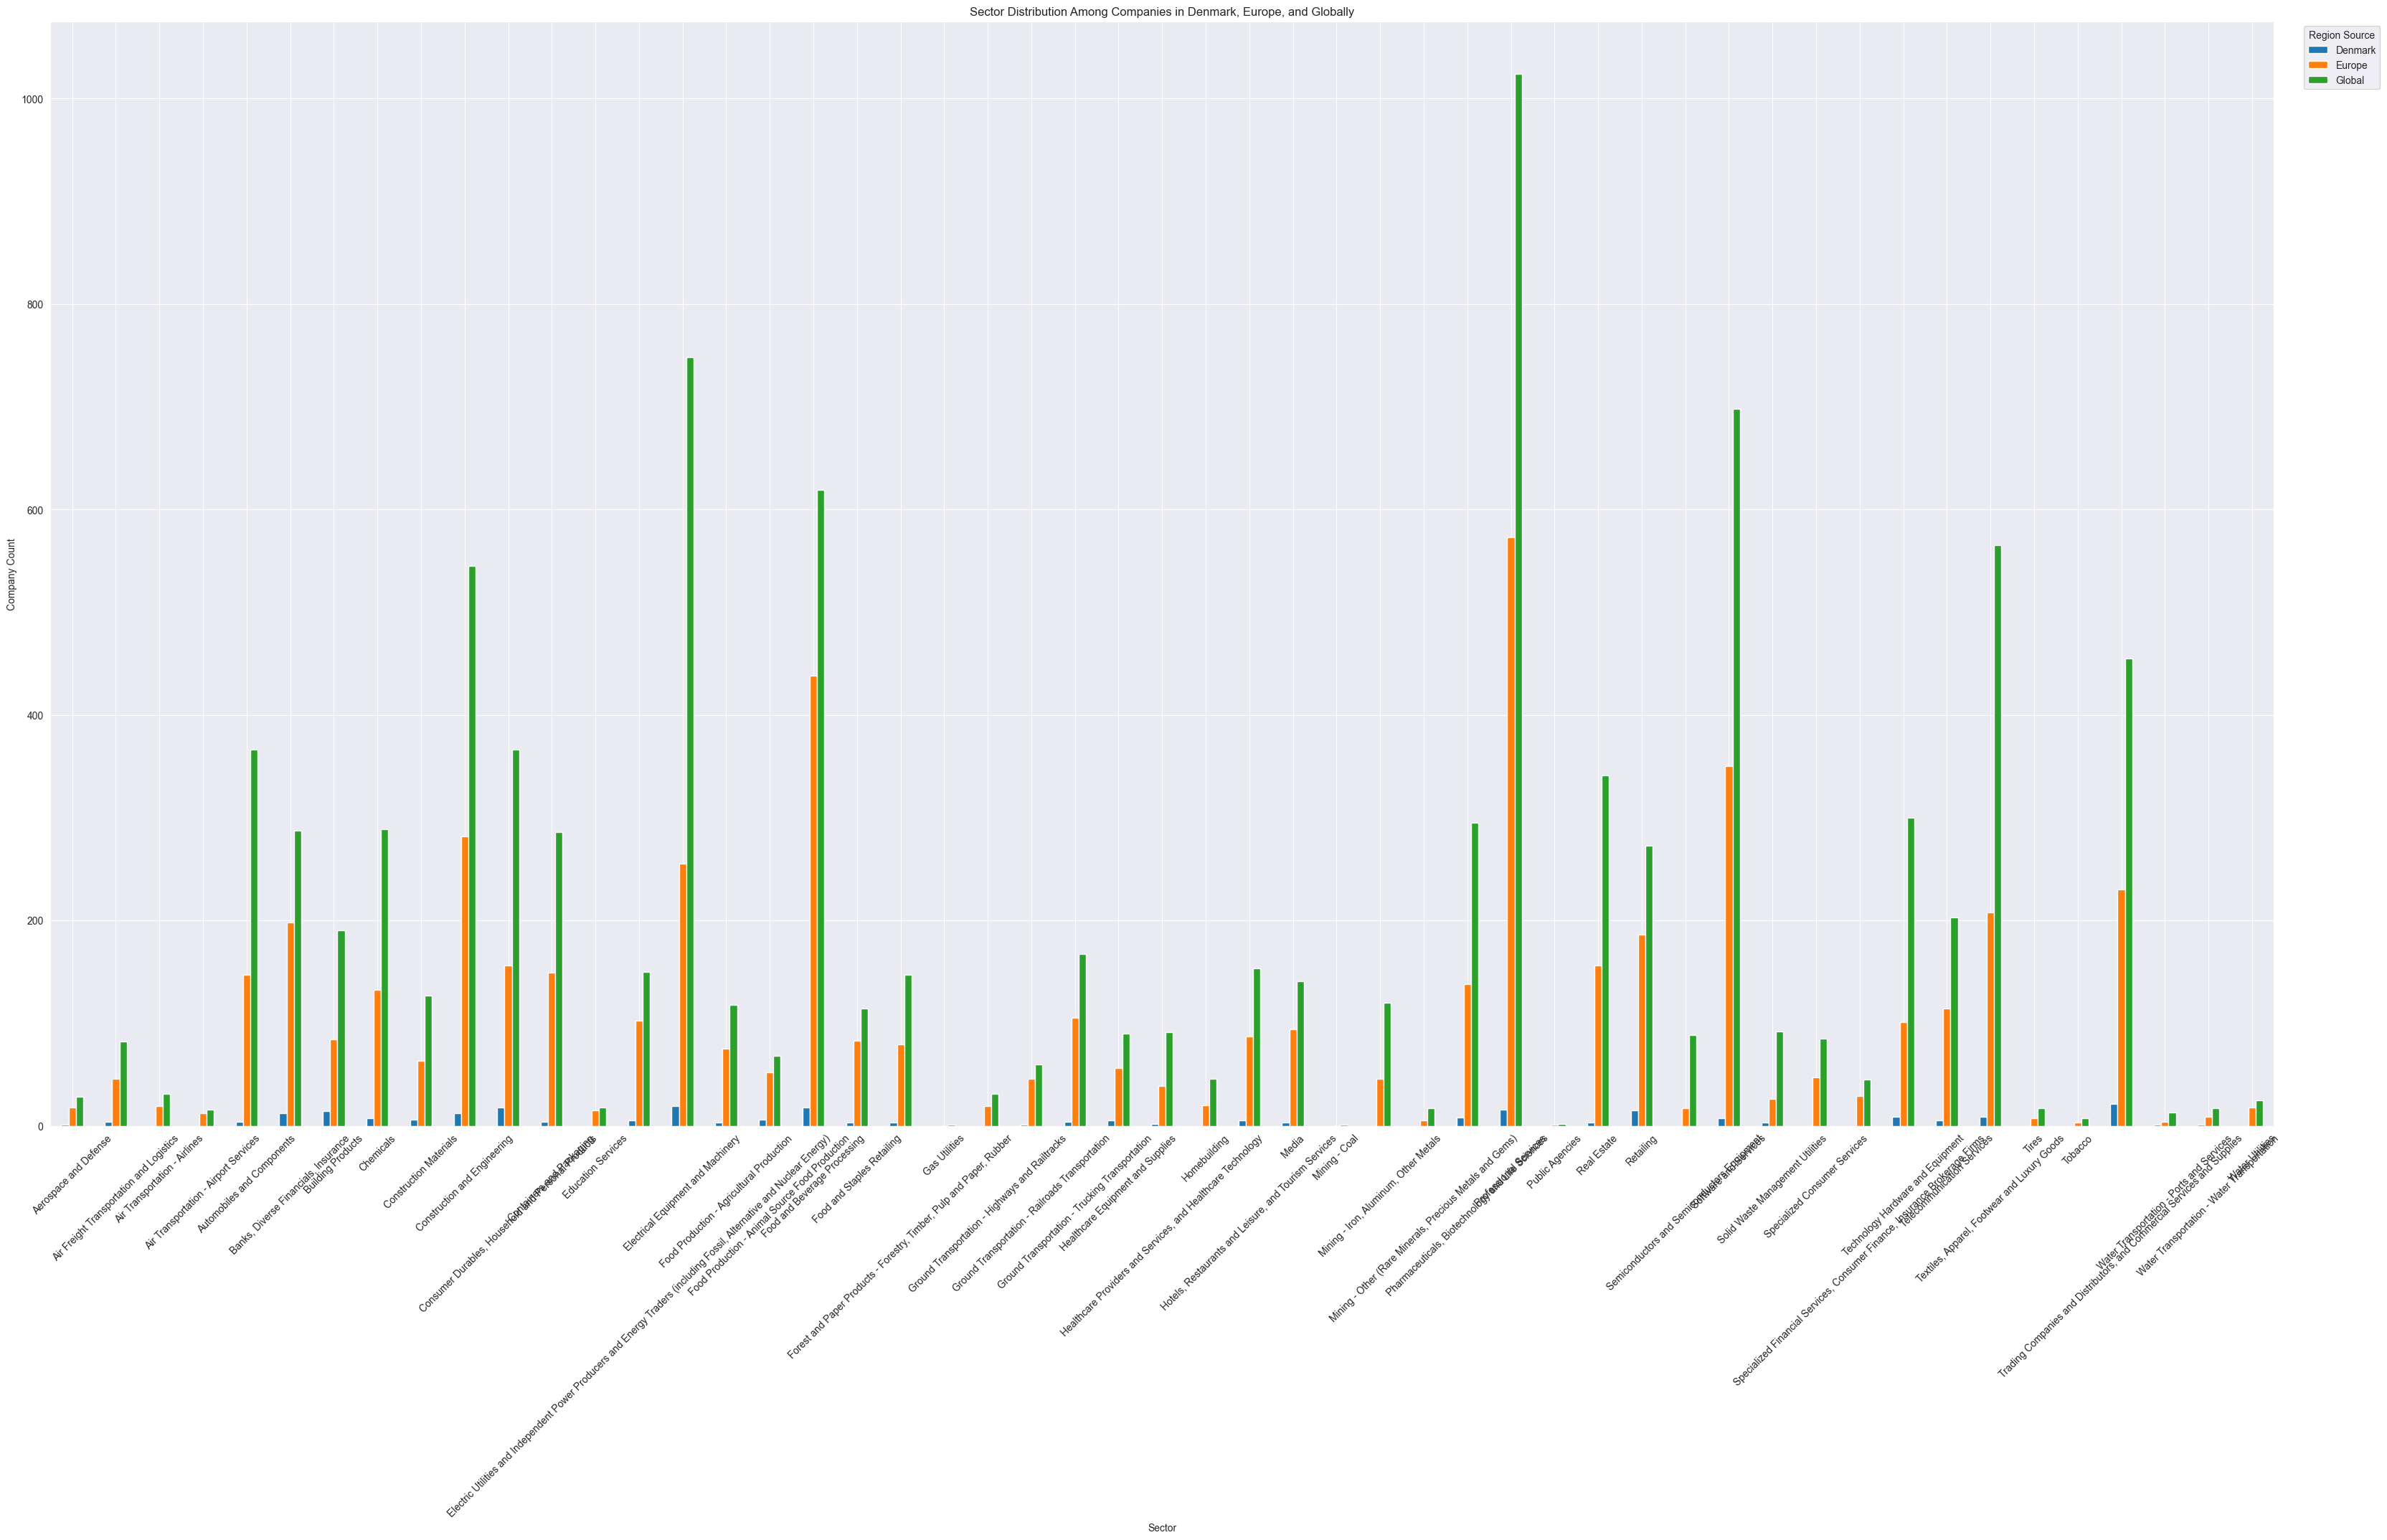

In [51]:
# Add labels
import textwrap



Comp_Global.loc[:, "data_source"] = "Global"
Comp_Europe.loc[:, "data_source"] = "Europe"
Comp_dk.loc[:, "data_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])

# Group by sector and data source to count occurrences
sector_counts = df.groupby(["sector", "data_source"]).size().unstack()

# Plot the bar chart
sector_counts.plot(kind="bar", figsize=(40, 20))

#labels = [textwrap.fill(label, 15) for label in sector_counts.index]
#plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xticks(ticks=range(len(sector_counts.index)), labels=sector_counts.index)
# Customize the chart
plt.title("Sector Distribution Among Companies in Denmark, Europe, and Globally")
plt.xlabel("Sector")
plt.ylabel("Company Count")
plt.legend(title="Region Source", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# Show plot
plt.show()

In [52]:
import plotly.express as px
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])
df_grouped = df.groupby(["sector", "region_source"]).size().reset_index(name="count")
fig = px.bar(df_grouped, x="sector", y="count", color="region_source", barmode="group")
fig.update_layout(title="Sector Distribution", xaxis_title="Sector", yaxis_title="Count")
fig.show()

C:\Users\Val\AppData\Local\Temp\ipykernel_1724\1802748572.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Val\AppData\Local\Temp\ipykernel_1724\1802748572.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
import plotly.express as px
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])
df_grouped = df.groupby(["sectorCat", "region_source"]).size().reset_index(name="count")
fig = px.bar(df_grouped, x="sectorCat", y="count", color="region_source", barmode="group")
fig.update_layout(title="Sector Distribution", xaxis_title="Sector", yaxis_title="Count")
fig.show()

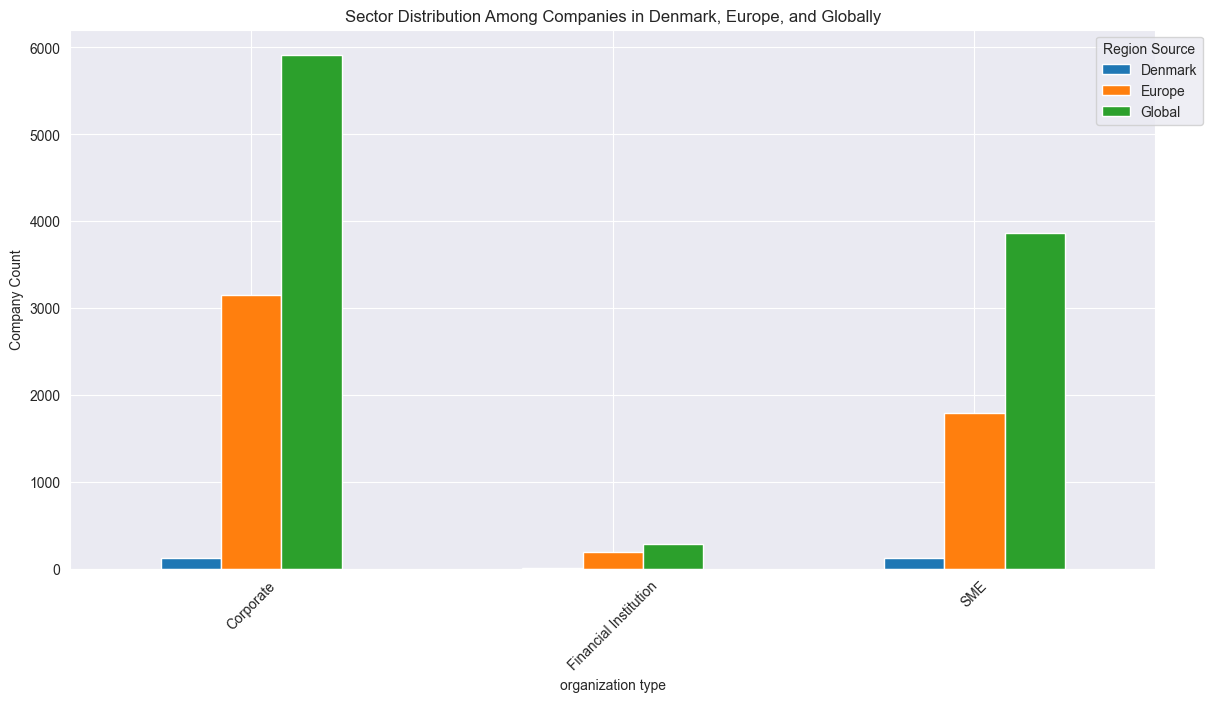

In [54]:
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])

# Group by sector and data source to count occurrences
organization_type_counts = df.groupby(["organization_type", "data_source"]).size().unstack()

# Plot the bar chart
organization_type_counts.plot(kind="bar", figsize=(14, 7))

#labels = [textwrap.fill(label, 15) for label in sector_counts.index]
#plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xticks(ticks=range(len(organization_type_counts.index)), labels=organization_type_counts.index)
# Customize the chart
plt.title("Sector Distribution Among Companies in Denmark, Europe, and Globally")
plt.xlabel("organization type")
plt.ylabel("Company Count")
plt.legend(title="Region Source", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# Show plot
plt.show()

In [55]:
import plotly.express as px

# Group data by sector and count occurrences
df_grouped = df.groupby("sector").size().reset_index(name="count")

# Create pie chart
fig = px.pie(df_grouped, names="sector", values="count", title="Sector Distribution")

# Show interactive chart
fig.show()

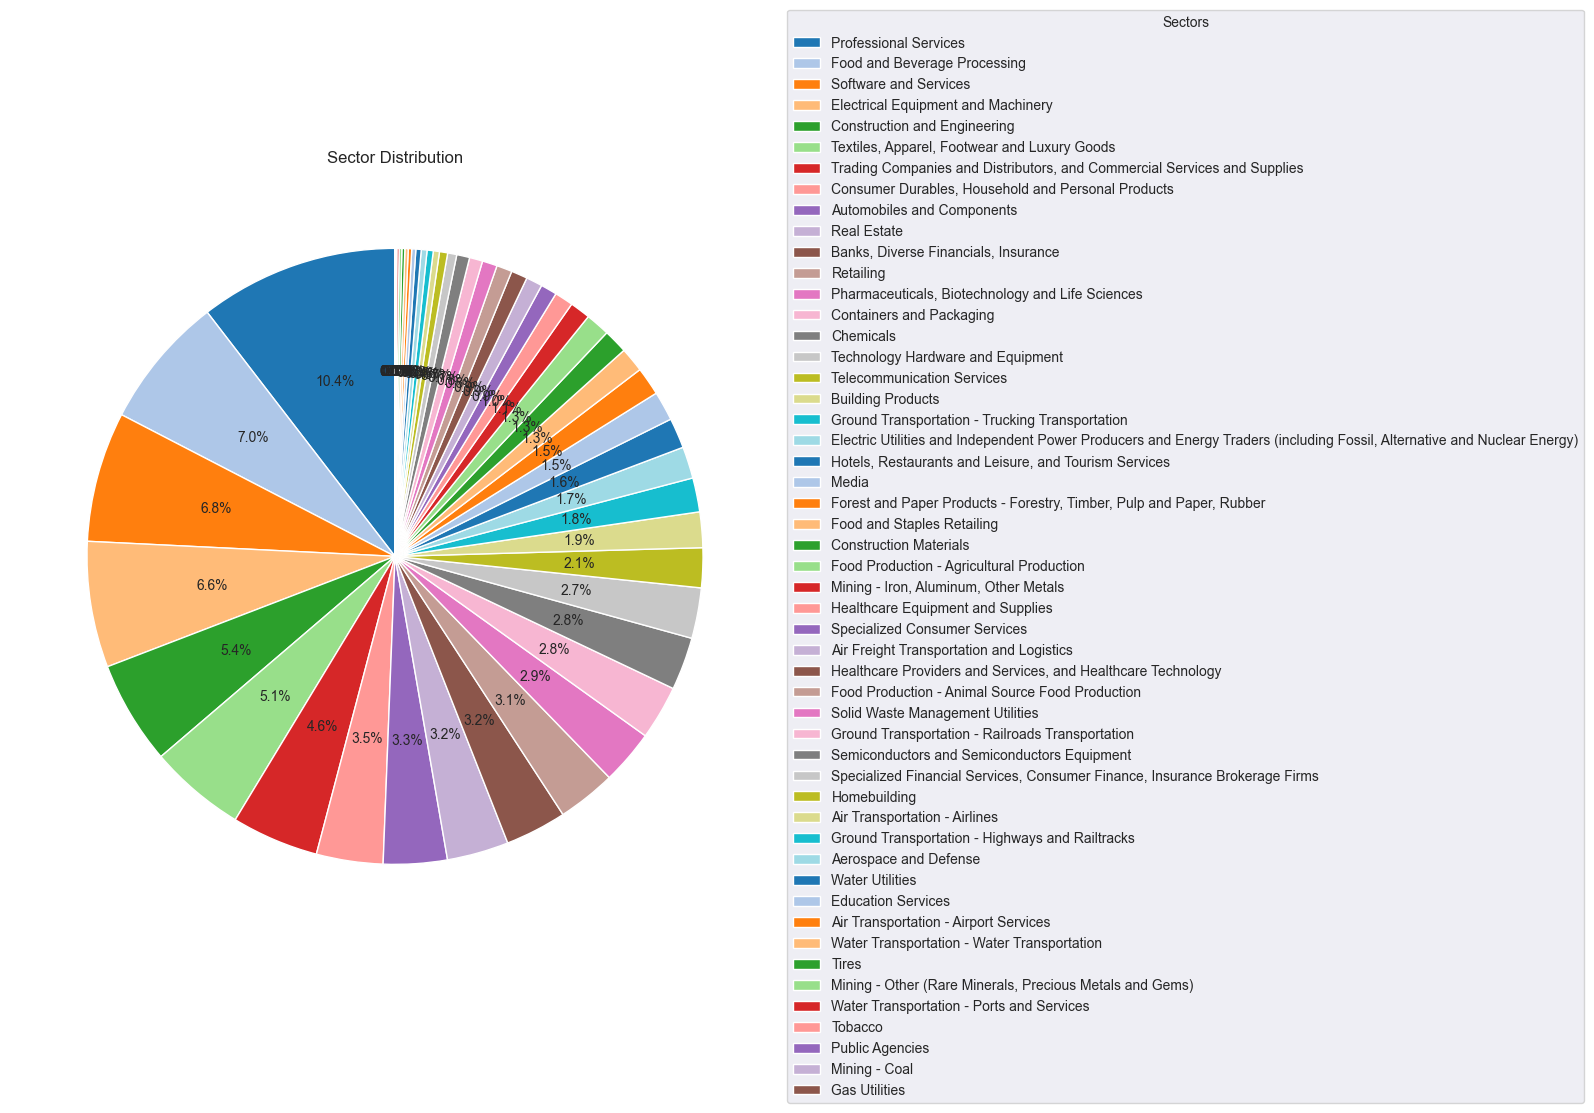

In [56]:

# Group data by sector and count occurrences
sector_counts = df["sector"].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(sector_counts, autopct="%1.1f%%", startangle=90, colors=plt.cm.tab20.colors)

# Move labels to a legend instead
ax.legend(wedges, sector_counts.index, title="Sectors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title("Sector Distribution")

# Show chart
plt.show()

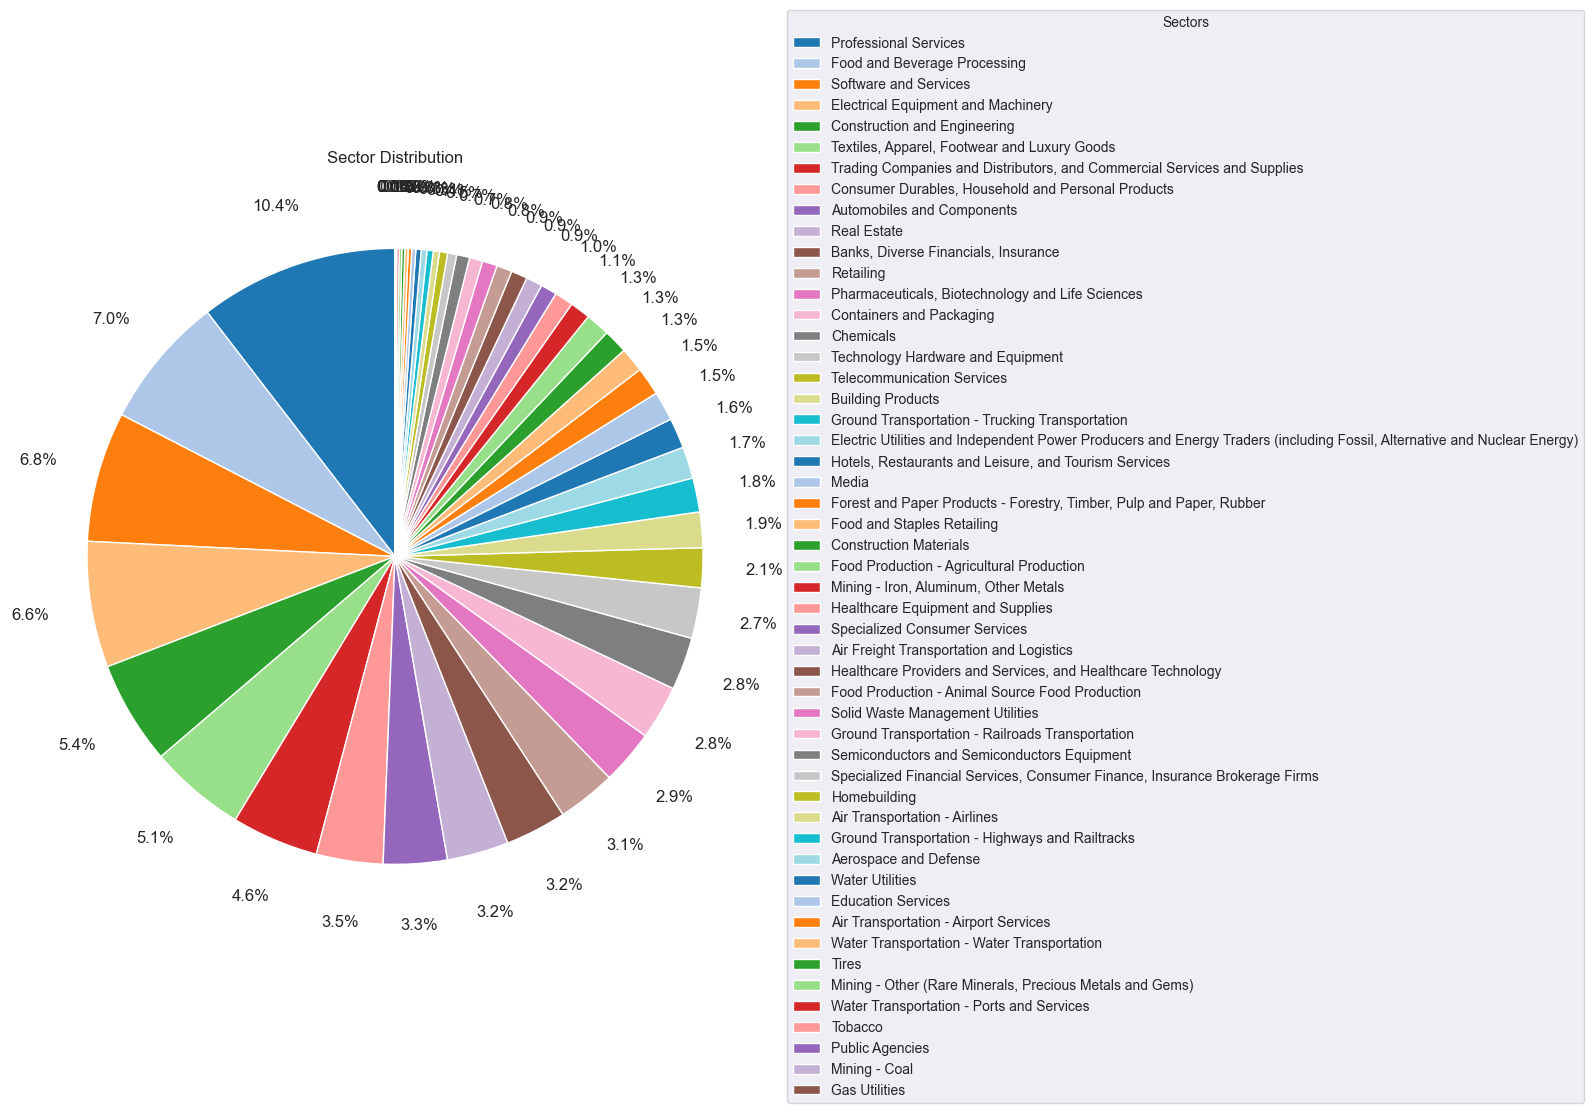

In [57]:

# Group data by sector and count occurrences
sector_counts = df["sector"].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    sector_counts,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors,
    pctdistance=1.2,  # Moves percentage labels outside
    textprops={"fontsize": 12}  # Adjust font size
)

# Move labels to a legend instead of on the pie
ax.legend(wedges, sector_counts.index, title="Sectors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title("Sector Distribution")

# Show chart
plt.show()

In [58]:
import plotly.express as px
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])
# Group data by sector and count occurrences
df_grouped = df.groupby("sector").size().reset_index(name="count")

# Create pie chart without percentage labels but with hover numbers
fig = px.pie(
    df_grouped,
    names="sector",
    values="count",
    title="Sector Distribution",
)

# Remove text labels from the slices (but keep hover info)
fig.update_traces(textinfo="none", hovertemplate="%{label}: %{value} (%{percent})")

# Show interactive chart
fig.show()

In [59]:

# Group data by sector and region, then count occurrences
df_grouped = df.groupby(["sector", "region_source"]).size().reset_index(name="count")

# Create pie chart
fig = px.pie(
    df_grouped,
    names="sector",
    values="count",
    title="Sector Distribution",
    color="region_source"  # Color sectors based on region
)

# Hide labels on slices but keep hover labels with percentage & region
fig.update_traces(textinfo="none", hovertemplate="%{label} (%{customdata}): %{value} (%{percent})")

# Add custom hover data (region)
fig.update_traces(customdata=df_grouped["region_source"])

# Show interactive chart
fig.show()

In [60]:

# Group data by sector and region, then count occurrences
df_grouped = df.groupby(["sector", "region_source"]).size().reset_index(name="count")

# Split data into separate DataFrames for each region
df_denmark = df_grouped[df_grouped["region_source"] == "Denmark"]
df_europe = df_grouped[df_grouped["region_source"] == "Europe"]
df_global = df_grouped[df_grouped["region_source"] == "Global"]

# Create subplots for comparison
figs = {
    "Denmark": px.pie(df_denmark, names="sector", values="count", title="Denmark Sector Distribution"),
    "Europe": px.pie(df_europe, names="sector", values="count", title="Europe Sector Distribution"),
    "Global": px.pie(df_global, names="sector", values="count", title="Global Sector Distribution"),
}

# Show charts separately
for title, fig in figs.items():
    fig.update_traces(textinfo="none", hovertemplate="%{label}: %{value} (%{percent})")  # Removes text on pie
    fig.show()

In [61]:
# Group data by sector and region, then count occurrences
df_grouped = df.groupby(["sector", "region_source"]).size().reset_index(name="count")


# Calculate total per region for percentage filtering
df_grouped["percent"] = df_grouped.groupby("region_source")["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 5%)
threshold = 2.5
df_grouped["filtered_percent"] = df_grouped["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")

# Create pie charts for comparison
figs = {
    "Denmark": px.pie(df_grouped[df_grouped["region_source"] == "Denmark"], names="sector", values="count", title="Denmark"),
    "Europe": px.pie(df_grouped[df_grouped["region_source"] == "Europe"], names="sector", values="count", title="Europe"),
    "Global": px.pie(df_grouped[df_grouped["region_source"] == "Global"], names="sector", values="count", title="Global"),
}

# Apply percentage filtering while removing sector names
for title, fig in figs.items():
    fig.update_traces(
        textinfo="text",  # Only show filtered percentages
        text=df_grouped[df_grouped["region_source"] == title]["filtered_percent"],  # Only larger percentages
        hovertemplate="%{label}: %{value} (%{percent})"  # Show full details on hover
    )
    fig.show()

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Group data by sector and region, then count occurrences
df_grouped = df.groupby(["sector", "region_source"]).size().reset_index(name="count")

# Calculate percentages for each sector within a region
df_grouped["percent"] = df_grouped.groupby("region_source")["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 5%)
threshold = 2.5
df_grouped["filtered_percent"] = df_grouped["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")

# Create subplot layout
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=["Denmark", "Europe", "Global"])

# Function to create pie traces
def add_pie_trace(region, col):
    region_data = df_grouped[df_grouped["region_source"] == region]
    fig.add_trace(
        go.Pie(
            labels=region_data["sector"],
            values=region_data["count"],
            text=region_data["filtered_percent"],  # Only show percentages above the threshold
            textinfo="text",  # Show percentages on chart only if above threshold
            hoverinfo="label+value+percent",  # Keep full hover info
            marker=dict(colors=sbt_palette[:len(region_data)]) # Apply custom colors
        ),
        row=1, col=col
    )

# Add each region's pie chart
add_pie_trace("Denmark", 1)
add_pie_trace("Europe", 2)
add_pie_trace("Global", 3)

# Update layout
fig.update_layout(title_text="Sector Distribution Across Denmark, Europe, and the Whole World", showlegend=True)

# Show the figure
fig.show()

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Group data by sector and region, then count occurrences
df_grouped = df.groupby(["sectorCat", "region_source"]).size().reset_index(name="count")

# Calculate percentages for each sector within a region
df_grouped["percent"] = df_grouped.groupby("region_source")["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 5%)
threshold = 2.5
df_grouped["filtered_percent"] = df_grouped["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")

# Create subplot layout
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=["Denmark", "Europe", "Global"])

# Function to create pie traces
def add_pie_trace(region, col):
    region_data = df_grouped[df_grouped["region_source"] == region]
    fig.add_trace(
        go.Pie(
            labels=region_data["sectorCat"],
            values=region_data["count"],
            text=region_data["filtered_percent"],  # Only show percentages above the threshold
            textinfo="text",  # Show percentages on chart only if above threshold
            hoverinfo="label+value+percent",  # Keep full hover info
            marker=dict(colors=sbt_palette[:len(region_data)]) # Apply custom colors
        ),
        row=1, col=col
    )

# Add each region's pie chart
add_pie_trace("Denmark", 1)
add_pie_trace("Europe", 2)
add_pie_trace("Global", 3)

# Update layout
fig.update_layout(title_text="Sector Catagories Distribution Across Denmark, Europe, and the Whole World",
                  showlegend=True,
                  font=dict(family = "C:/Windows/Fonts/SourceSansPro-Light.otf", size = 12, color = "black"  ),
                  paper_bgcolor="rgba(255,255,255,255)",  # Transparent background
                  plot_bgcolor="rgba(255,255,255,255)"   # Transparent plot area
                  )

# Show the figure
fig.write_html("SectorCatDKvEUvWW.html")
fig.show()

In [67]:
from math import pi
import pandas as pd
from bokeh.plotting import figure, show, output_file, save
from bokeh.models import ColumnDataSource, HoverTool, Select, CustomJS
from bokeh.layouts import row, column
from bokeh.palettes import Category20
from bokeh.io import curdoc

# Define your dataset (assuming 'df' includes 'year_updated' column)
df_grouped = df.groupby(["sectorCat", "region_source", "year_updated"]).size().reset_index(name="count")

# Calculate percentages within each year
df_grouped["percent"] = df_grouped.groupby(["region_source", "year_updated"])["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 2.5%)
threshold = 2.5
df_grouped["filtered_percent"] = df_grouped["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")

# Get available years from the dataset
available_years = sorted(df_grouped["year_updated"].unique())

# Function to create pie chart data
def create_pie_data(region, selected_year):
    region_data = df_grouped[(df_grouped["region_source"] == region) & (df_grouped["year_updated"] == selected_year)].copy()
    region_data["angle"] = region_data["count"] / region_data["count"].sum() * 2 * pi
    region_data["start_angle"] = region_data["angle"].cumsum().shift(fill_value=0)
    region_data["end_angle"] = region_data["angle"].cumsum()
    region_data["color"] = [sbt_palette[i % len(sbt_palette)] for i in range(len(region_data))]

    return ColumnDataSource(region_data)

# Initial year selection
selected_year = available_years[-1]  # Default to latest available year

# Create initial pie charts
denmark_source = create_pie_data("Denmark", selected_year)
europe_source = create_pie_data("Europe", selected_year)
global_source = create_pie_data("Global", selected_year)

# Function to create pie chart
def create_pie_chart(title, source):
    p = figure(title=title, width=400, height=400, toolbar_location=None, tools="")
    p.wedge(x=0, y=0, radius=0.7,
            start_angle="start_angle", end_angle="end_angle",
            line_color="white", fill_color="color", source=source)

    hover = HoverTool(tooltips=[("Sector", "@sectorCat"), ("Count", "@count"), ("Percent", "@filtered_percent")])
    p.add_tools(hover)

    # Remove background and grid
    p.background_fill_color = None
    p.border_fill_color = None
    p.axis.visible = False
    p.grid.visible = False

    return p

# Create pie charts
denmark_pie = create_pie_chart("Denmark", denmark_source)
europe_pie = create_pie_chart("Europe", europe_source)
global_pie = create_pie_chart("Global", global_source)

year_select = Select(title="Select Year:", value=str(selected_year), options=[str(year) for year in available_years])

callback = CustomJS(args=dict(
    year_select=year_select,
    denmark_data=df_grouped[df_grouped["region_source"] == "Denmark"].to_dict(orient="list"),
    europe_data=df_grouped[df_grouped["region_source"] == "Europe"].to_dict(orient="list"),
    global_data=df_grouped[df_grouped["region_source"] == "Global"].to_dict(orient="list"),
    denmark_source=denmark_source, europe_source=europe_source, global_source=global_source
), code="""
    var selected_year = parseInt(year_select.value);

    function updateSource(data, source) {
        var new_data = {sectorCat: [], count: [], percent: [], filtered_percent: [], angle: [], start_angle: [], end_angle: [], color: []};
        var year_data = data['year_updated'];

        for (var i = 0; i < year_data.length; i++) {
            if (year_data[i] === selected_year) {
                new_data.sectorCat.push(data['sectorCat'][i]);
                new_data.count.push(data['count'][i]);
                new_data.percent.push(data['percent'][i]);
                new_data.filtered_percent.push(data['filtered_percent'][i]);
            }
        }

        var total = new_data.count.reduce((sum, val) => sum + val, 0);
        if (total > 0) {
            new_data.angle = new_data.count.map(v => v / total * 2 * Math.PI);
            var cumulative = 0;
            for (var j = 0; j < new_data.angle.length; j++) {
                new_data.start_angle.push(cumulative);
                cumulative += new_data.angle[j];
                new_data.end_angle.push(cumulative);
            }

            new_data.color = new_data.sectorCat.map((_, i) => Category20[i % Category20.length]);

            source.data = new_data;
            source.change.emit();
        }
    }

    updateSource(denmark_data, denmark_source);
    updateSource(europe_data, europe_source);
    updateSource(global_data, global_source);
""")

# Link dropdown to update function
# Create dropdown widget for selecting year

year_select.js_on_change("value", callback)

# Arrange layout with dropdown + pie charts
layout = column(year_select, row(denmark_pie, europe_pie, global_pie))
#output_file("../InteractiveGraphs/comparison_plot.html")
#save(layout)
# Show the figure
show(layout)
#curdoc().add_root(layout)


In [70]:
from bokeh.plotting import figure, show
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Select, CustomJS
from math import pi
import pandas as pd

Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])


# Add region_source to dataset
#df.loc[df["region_source"].isnull(), "region_source"] = "Global"

# Define your dataset (assuming 'df' includes 'year_updated' column)
df_grouped = df.groupby(["sectorCat", "region_source", "year_updated"]).size().reset_index(name="count")

# Calculate percentages within each year
df_grouped["percent"] = df_grouped.groupby(["region_source", "year_updated"])["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 2.5%)
threshold = 2.5
df_grouped["filtered_percent"] = df_grouped["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")

# Get unique years from dataset
all_years = sorted(df_grouped["year_updated"].unique())

# Function to prepare pie data (now using `df`)
def get_pie_data(data, year, region):
    filtered = data[(data["year_updated"] == year) & (data["region_source"] == region)].groupby("sectorCat")["count"].sum().reset_index()

    if filtered.empty:
        return ColumnDataSource(pd.DataFrame({"sectorCat": [], "count": [], "start_angle": [], "end_angle": [], "color": []}))

    total = filtered["count"].sum()
    filtered["angle"] = filtered["count"] / total * 2 * pi
    filtered["start_angle"] = filtered["angle"].cumsum().shift(fill_value=0)
    filtered["end_angle"] = filtered["angle"].cumsum()
    filtered["color"] = [sbt_palette[i % len(sbt_palette)] for i in range(len(filtered))]

    return ColumnDataSource(filtered)

# Initial year selection
initial_year = all_years[-1]  # Default to latest available year

# Create initial pie charts
denmark_source = get_pie_data(df_grouped, initial_year, "Denmark")
europe_source = get_pie_data(df_grouped, initial_year, "Europe")
global_source = get_pie_data(df_grouped, initial_year, "Global")

# Create pie chart
# Function to create pie chart
def create_pie_chart(title, source):
    p = figure(title=title, width=400, height=400, toolbar_location=None, tools="")
    p.wedge(x=0, y=0, radius=0.7,
            start_angle="start_angle", end_angle="end_angle",
            line_color="white", fill_color="color", source=source)

    hover = HoverTool(tooltips=[("Sector", "@sectorCat"), ("Count", "@count")])
    p.add_tools(hover)

    p.background_fill_color = None
    p.border_fill_color = None
    p.axis.visible = False
    p.grid.visible = False

    return p
# Create pie charts
denmark_pie = create_pie_chart("Denmark", denmark_source)
europe_pie = create_pie_chart("Europe", europe_source)
global_pie = create_pie_chart("Global", global_source)

# Create dropdown widget for selecting year
year_select = Select(title="Select Year:", value=str(initial_year), options=[str(year) for year in all_years])

# JavaScript Callback for Dynamic Updates
callback = CustomJS(args=dict(
    year_select=year_select,
    denmark_data=df_grouped[df_grouped["region_source"] == "Denmark"].to_dict(orient="list"),
    europe_data=df_grouped[df_grouped["region_source"] == "Europe"].to_dict(orient="list"),
    global_data=df_grouped[df_grouped["region_source"] == "Global"].to_dict(orient="list"),
    denmark_source=denmark_source, europe_source=europe_source, global_source=global_source
), code="""
    var selected_year = parseInt(year_select.value);

    function updateSource(data, source) {
        var new_data = {sectorCat: [], count: [], angle: [], start_angle: [], end_angle: [], color: []};

        var year_data = data['year_updated'];

        for (var i = 0; i < year_data.length; i++) {
            if (year_data[i] === selected_year) {
                new_data.sectorCat.push(data['sectorCat'][i]);
                new_data.count.push(data['count'][i]);
            }
        }

        var total = new_data.count.reduce((sum, val) => sum + val, 0);
        if (total > 0) {
            new_data.angle = new_data.count.map(v => v / total * 2 * Math.PI);
            var cumulative = 0;
            for (var j = 0; j < new_data.angle.length; j++) {
                new_data.start_angle.push(cumulative);
                cumulative += new_data.angle[j];
                new_data.end_angle.push(cumulative);
            }

            new_data.color = new_data.sectorCat.map((_, i) => Category20[i % Category20.length]);

            source.data = new_data;
            source.change.emit();
        }
    }

    updateSource(denmark_data, denmark_source);
    updateSource(europe_data, europe_source);
    updateSource(global_data, global_source);
""")

# Link dropdown to update function
year_select.js_on_change("value", callback)

# Arrange layout with dropdown + pie charts
layout = column(year_select, row(denmark_pie, europe_pie, global_pie))

# Show the figure
show(layout)